## View detection

### 1. Imports

In [9]:
import cv2
from matplotlib import pyplot as plt

from helpers.view_detection import get_view_mask


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


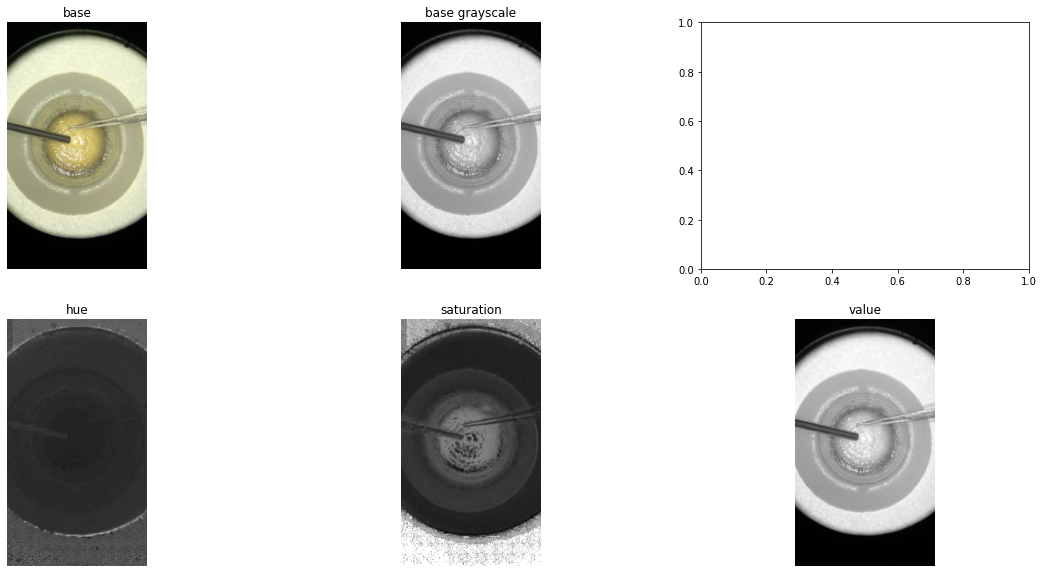

size: 290x512


In [10]:
scale = 0.33

base = cv2.imread('data/artificial/bioniko_rhexis_base3.png', cv2.IMREAD_COLOR)
base = cv2.resize(base, (0, 0), fx=scale, fy=scale)

base_rgb = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)
base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)
base_hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)

base_hue = base_hsv[:, :, 0]
base_saturation = base_hsv[:, :, 1]
base_value = base_hsv[:, :, 2]

fig, ((plot1, plot2, _), (plot3, plot4, plot5)
      ) = plt.subplots(2, 3, figsize=(20, 10))
plot1.set_title('base')
plot1.imshow(base_rgb)
plot1.axis('off')

plot2.set_title('base grayscale')
plot2.imshow(base_gray, cmap=plt.cm.gray)
plot2.axis('off')

plot3.set_title('hue')
plot3.imshow(base_hue, cmap=plt.cm.gray)
plot3.axis('off')

plot4.set_title('saturation')
plot4.imshow(base_saturation, cmap=plt.cm.gray)
plot4.axis('off')

plot5.set_title('value')
plot5.imshow(base_value, cmap=plt.cm.gray)
plot5.axis('off')

plt.show()

print('size: %dx%d' % (base.shape[1], base.shape[0]))

### 2. Circle detection with inout validation (minimized)
For more info see `get_view_mask` method.

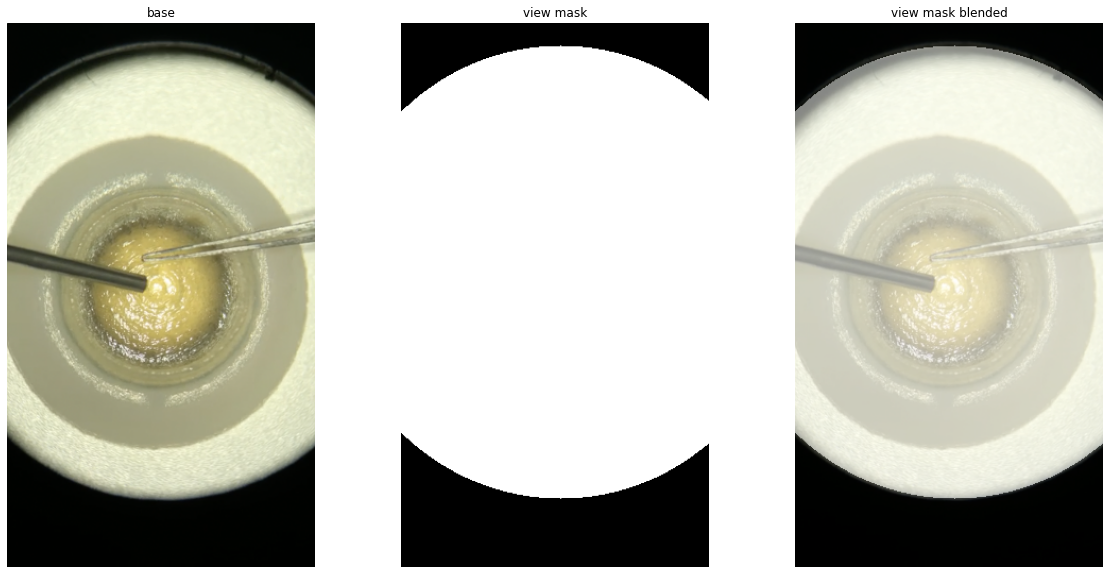

In [11]:
view_mask = get_view_mask(base_gray, radius_shrink=1.0)
view_blended = cv2.addWeighted(
    base_rgb,
    0.5,
    cv2.cvtColor(view_mask, cv2.COLOR_GRAY2RGB),
    0.5,
    0.0
)

fig, plots = plt.subplots(1, 3, figsize=(20, 10))
plots[0].set_title('base')
plots[0].imshow(base_rgb)
plots[0].axis('off')

plots[1].set_title('view mask')
plots[1].imshow(view_mask, cmap='gray')
plots[1].axis('off')

plots[2].set_title('view mask blended')
plots[2].imshow(view_blended)
plots[2].axis('off')

plt.show()

### 3. Validation of the results

[]

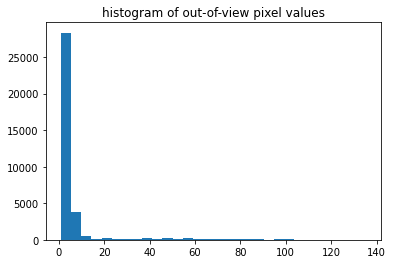

In [12]:
plt.title('histogram of out-of-view pixel values')
plt.hist(base_value[view_mask == 0], bins=30)
plt.plot()